In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series/household_power_consumption.txt


In [2]:
pd.set_option('display.max_columns',None)

In [3]:
# load and clean-up power usage data
from numpy import nan
from pandas import read_csv
# load all data
dataset = read_csv('/kaggle/input/time-series/household_power_consumption.txt', sep=';', header=0, low_memory=False,
                                infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(dataset.shape)

display(dataset.head())
# mark all missing values
dataset.replace('?', nan, inplace=True)
# add a column for for the remainder of sub metering
values = dataset.values.astype('float32')
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] +
                                                                           values[:,6])
# save updated dataset
dataset.to_csv('household_power_consumption.csv')
# load the new dataset and summarize
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
display(dataset.head())


(2075259, 7)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


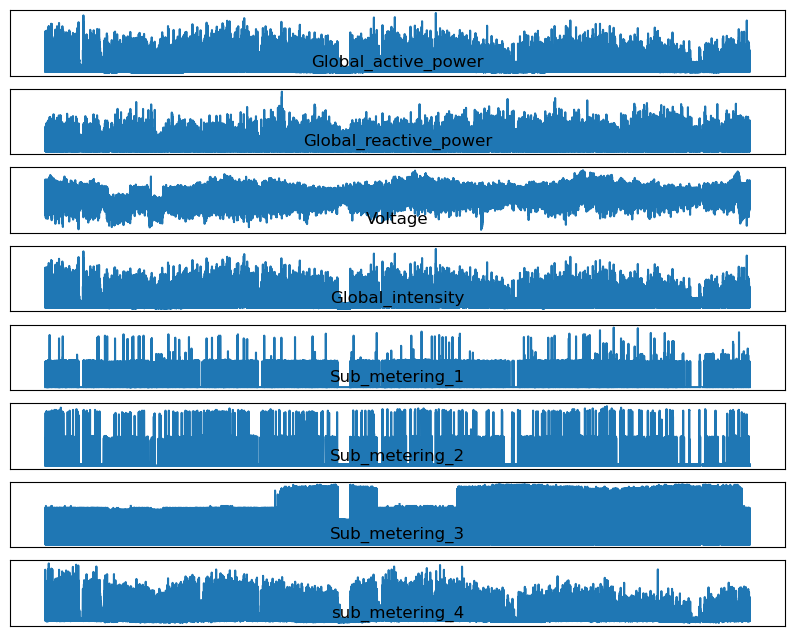

In [4]:
# line plots for power usage dataset
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True,
parse_dates=['datetime'], index_col=['datetime'])
# line plot for each variable
pyplot.figure(figsize=(10,8))
for i in range(len(dataset.columns)):
    # create subplot
    pyplot.subplot(len(dataset.columns), 1, i+1)
    # get variable name
    name = dataset.columns[i]
    # plot data
    pyplot.plot(dataset[name])
    # set title
    pyplot.title(name, y=0)
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()

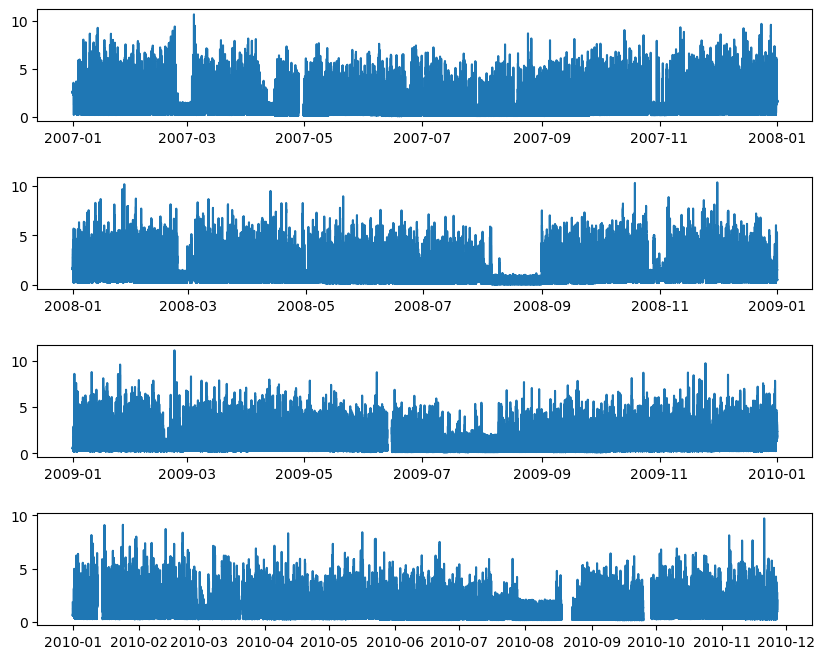

In [5]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
pyplot.figure(figsize=(10,8))

# Adjust the spacing between subplots
pyplot.subplots_adjust(hspace=0.5)

for i in range(len(years)):
    # prepare subplot
    ax = pyplot.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = dataset.loc[str(year)]
    # plot the active power for the year
    pyplot.plot(result['Global_active_power'])
pyplot.show()

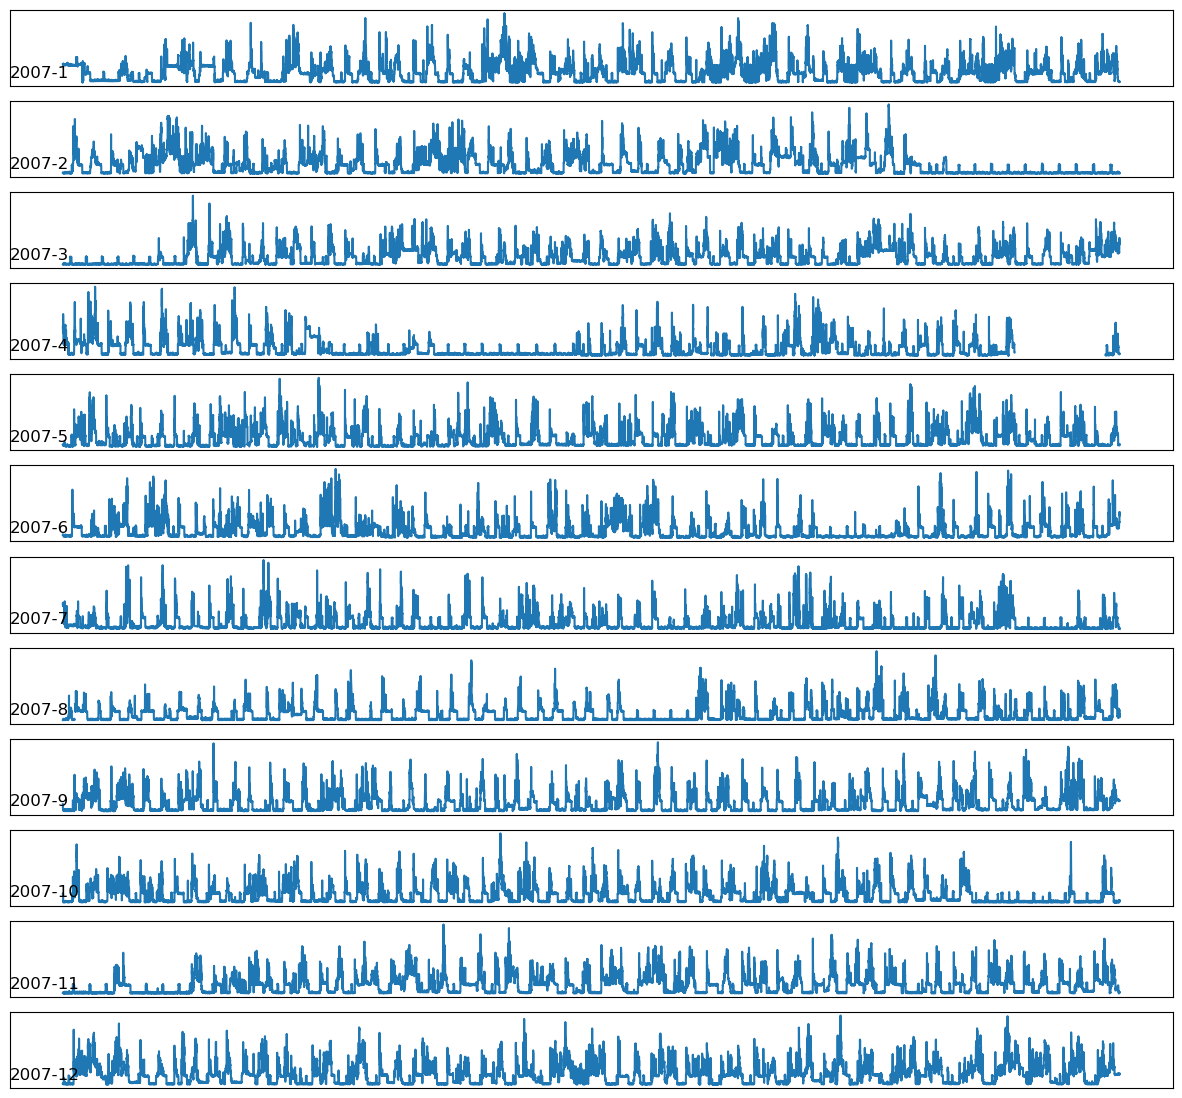

In [6]:
# plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure(figsize=(15,14))
for i in range(len(months)):
    # prepare subplot
    ax = pyplot.subplot(len(months), 1, i+1)
    # determine the month to plot
    month = '2007-' + str(months[i])
    # get all observations for the month
    result = dataset.loc[month]
    # plot the active power for the month
    pyplot.plot(result['Global_active_power'])
    # add a title to the subplot
    pyplot.title(month, y=0, loc='left')
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()

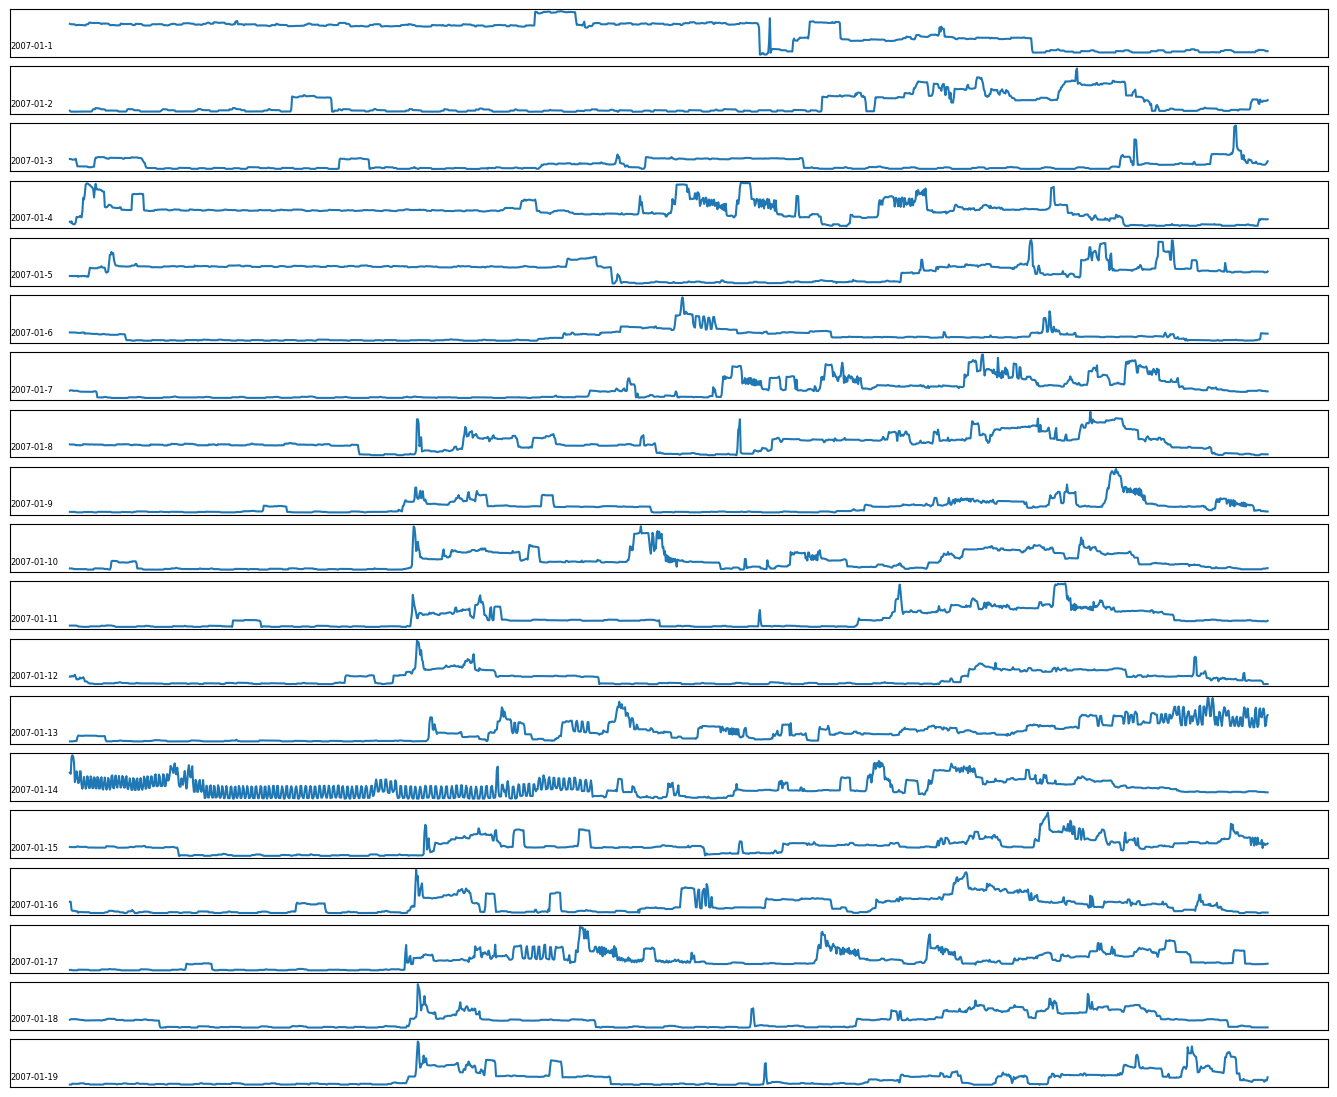

In [7]:
# plot active power for each year
days = [x for x in range(1, 20)]
pyplot.figure(figsize=(17,14))
for i in range(len(days)):
    # prepare subplot
    ax = pyplot.subplot(len(days), 1, i+1)
    # determine the day to plot
    day = '2007-01-' + str(days[i])
    # get all observations for the day
    result = dataset.loc[day]
    # plot the active power for the day
    pyplot.plot(result['Global_active_power'])
    # add a title to the subplot
    pyplot.title(day, y=0, loc='left', size=6)
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()

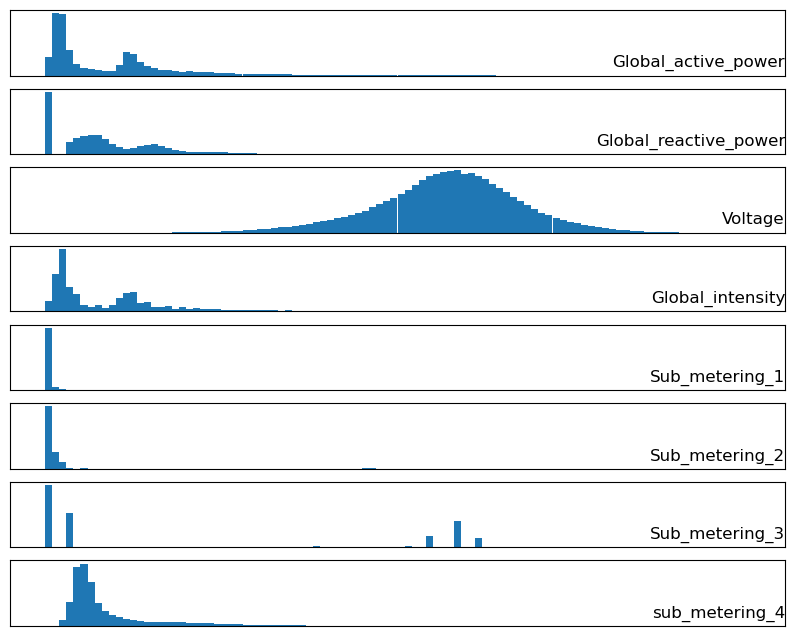

In [8]:
# histogram plot for each variable
pyplot.figure(figsize=(10,8))
for i in range(len(dataset.columns)):
    # create subplot
    pyplot.subplot(len(dataset.columns), 1, i+1)
    # get variable name
    name = dataset.columns[i]
    # create histogram
    dataset[name].hist(bins=100)
    # set title
    pyplot.title(name, y=0, loc='right')
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()


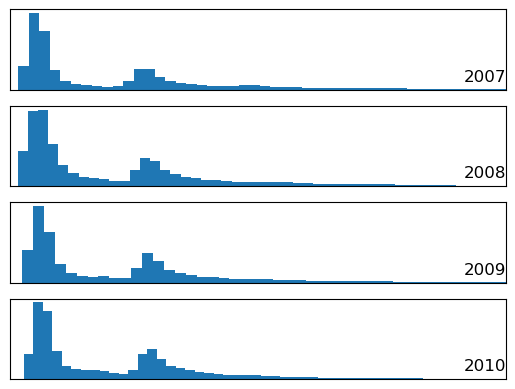

In [9]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
pyplot.figure()
for i in range(len(years)):
    # prepare subplot
    ax = pyplot.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = dataset.loc[str(year)]
    # plot the active power for the year
    result['Global_active_power'].hist(bins=100)
    # zoom in on the distribution
    ax.set_xlim(0, 5)
    pyplot.title(str(year), y=0, loc='right')
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()

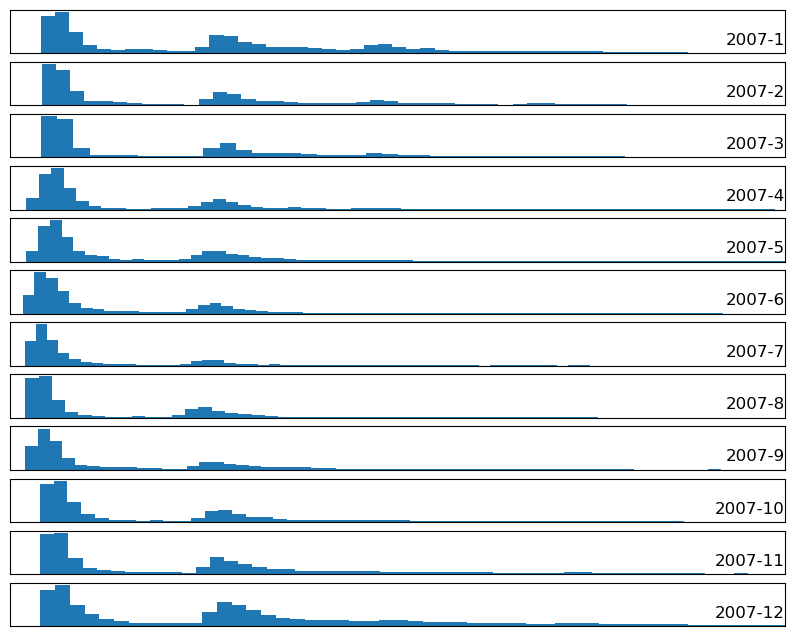

In [10]:
# monthly histogram plots for power usage dataset
# plot active power for each year
months = [x for x in range(1, 13)]
pyplot.figure(figsize=(10,8))
for i in range(len(months)):
    # prepare subplot
    ax = pyplot.subplot(len(months), 1, i+1)
    # determine the month to plot
    month = '2007-' + str(months[i])
    # get all observations for the month
    result = dataset.loc[month]
    # plot the active power for the month
    result['Global_active_power'].hist(bins=100)
    # zoom in on the distribution
    ax.set_xlim(0, 5)
    # add a title to the subplot
    pyplot.title(month, y=0, loc='right')
    # turn off ticks to remove clutter
    pyplot.yticks([])
    pyplot.xticks([])
pyplot.show()

## Some More Resampled Visualizations

In [11]:
import matplotlib.pyplot as plt

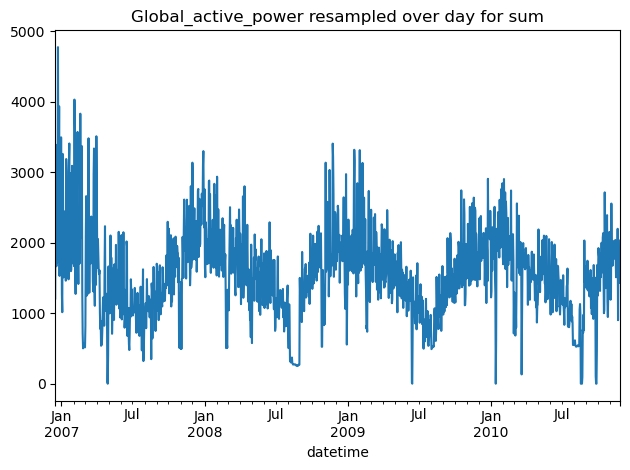

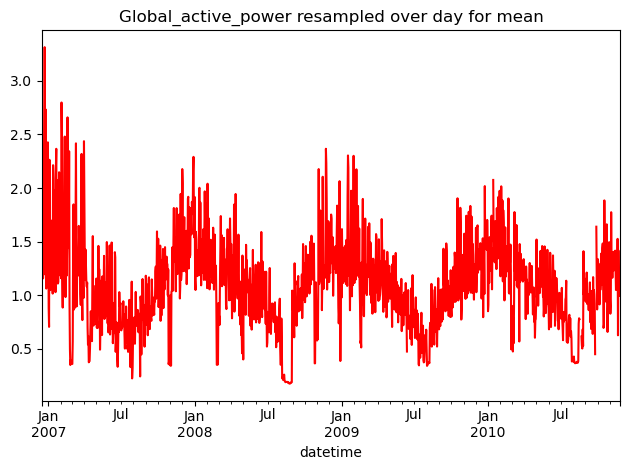

In [12]:
dataset.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

dataset.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

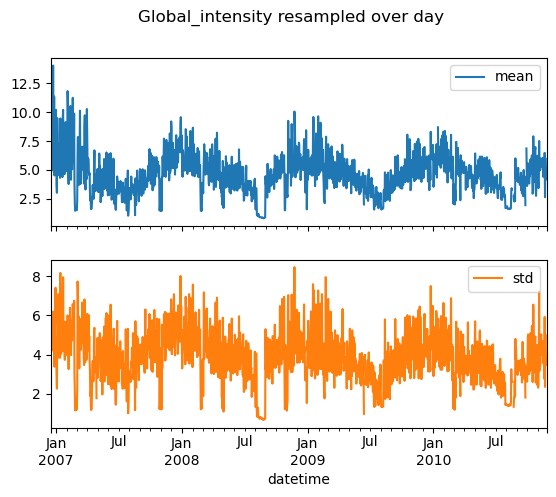

In [13]:
### Below I show mean and std of 'Global_intensity' resampled over day 
r = dataset.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

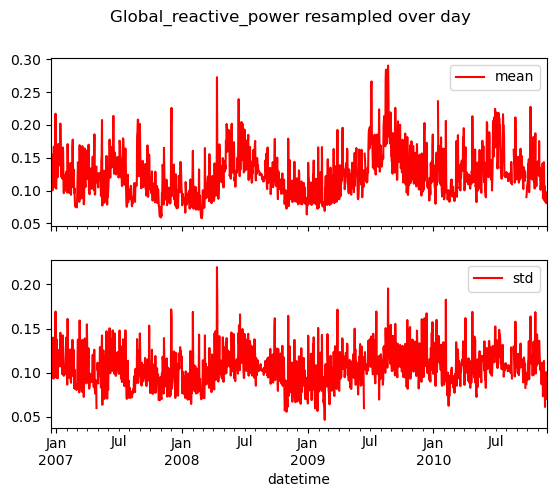

In [14]:
### Below I show mean and std of 'Global_reactive_power' resampled over day
r2 = dataset.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

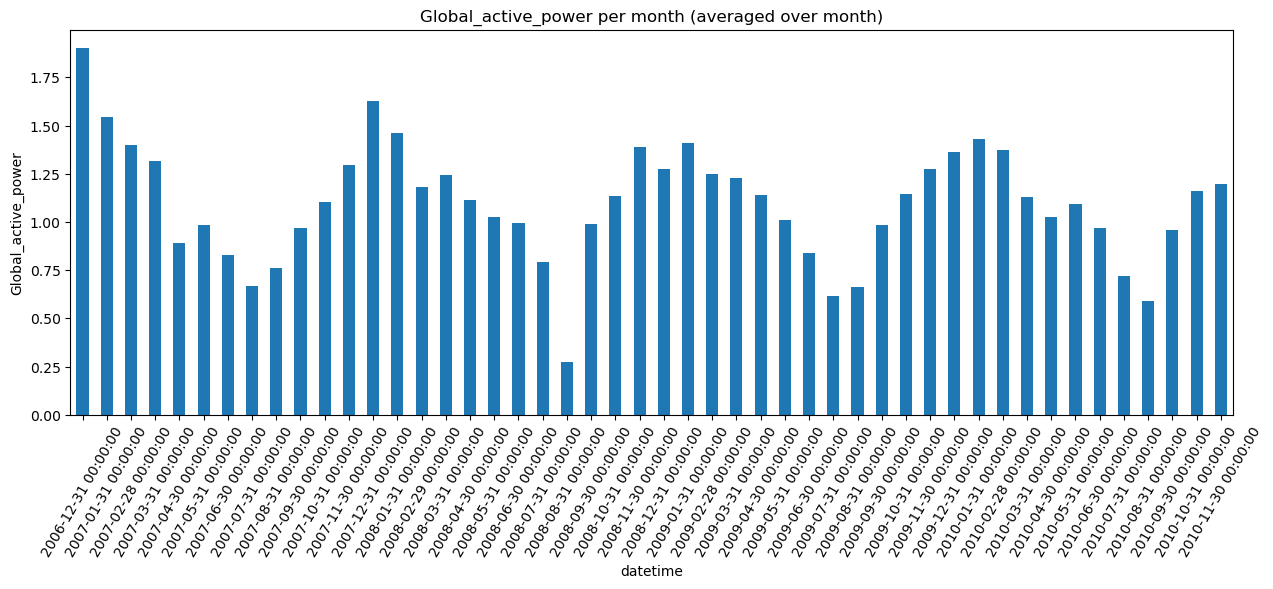

In [15]:
plt.figure(figsize=(15,5))
### Sum of 'Global_active_power' resampled over month
# Sum of 'Global_active_power' resampled over month
dataset['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

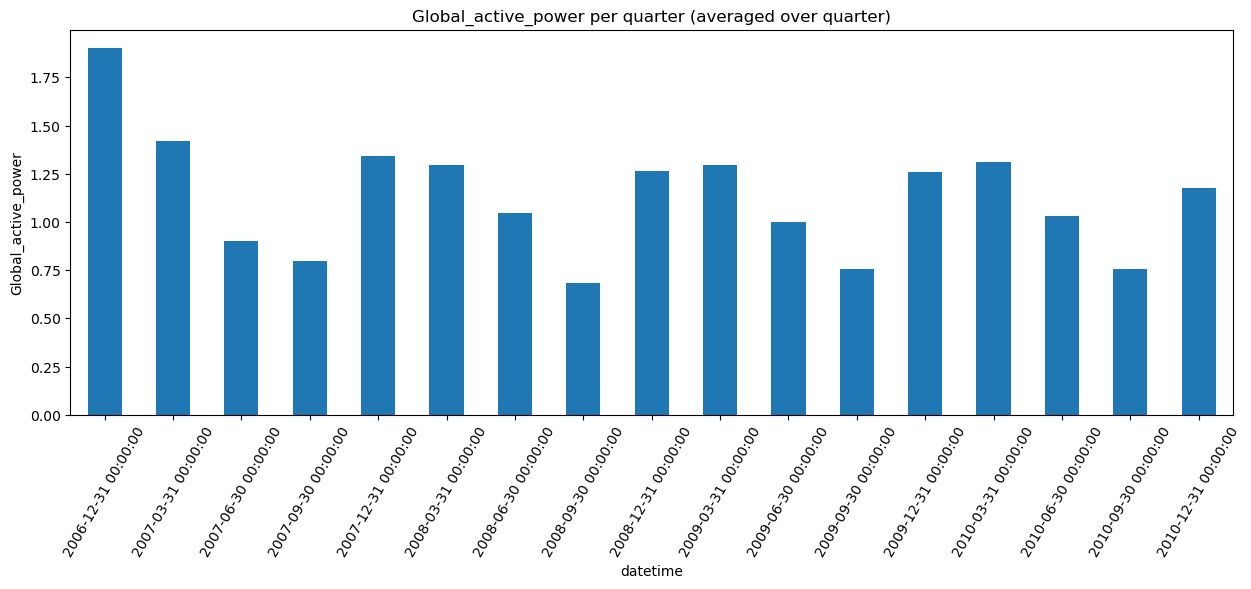

In [16]:
plt.figure(figsize=(15,5))
## Mean of 'Global_active_power' resampled over quarter
dataset['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

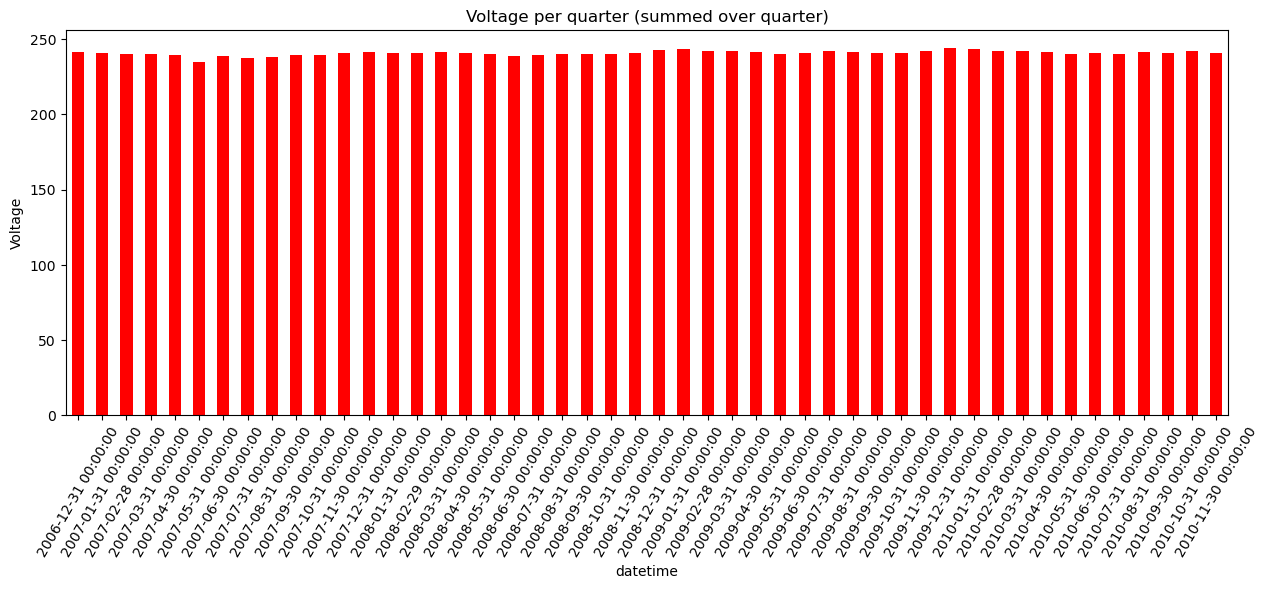

In [17]:
plt.figure(figsize=(15,5))
## mean of 'Voltage' resampled over month
dataset['Voltage'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

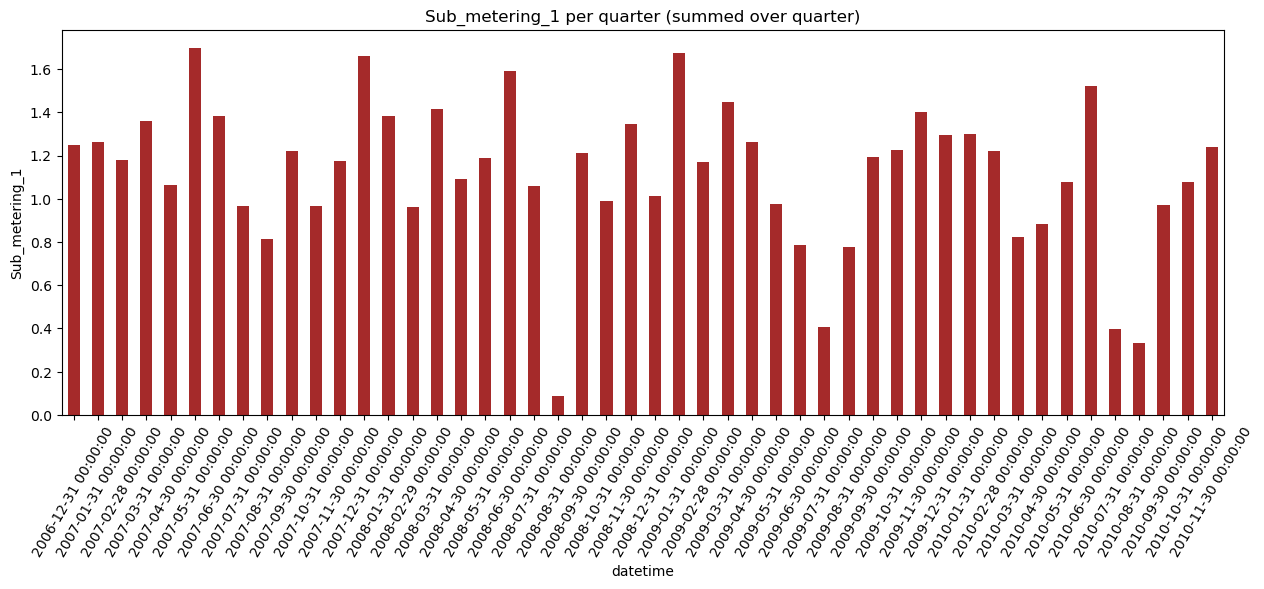

In [18]:
plt.figure(figsize=(15,5))
dataset['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

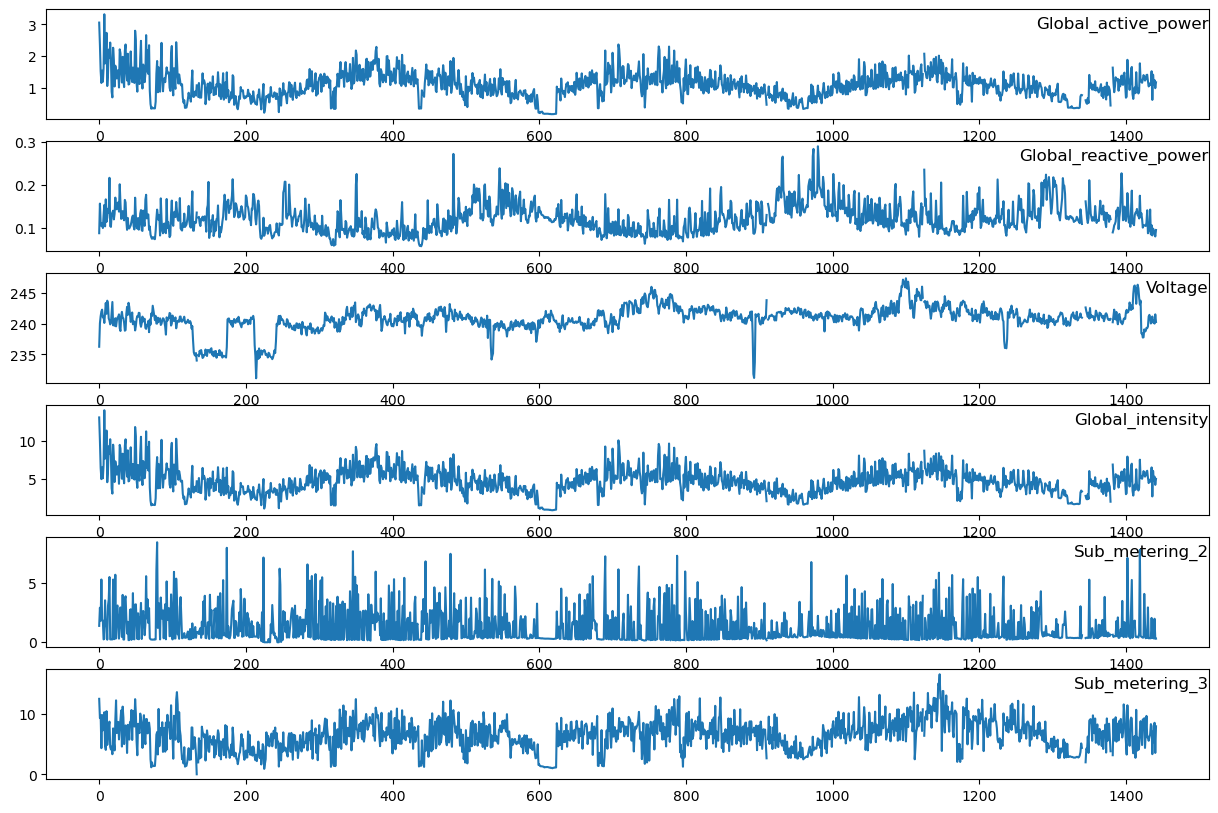

In [19]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = dataset.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
    plt.subplot(len(cols), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.75, loc='right')
    i += 1
plt.show()

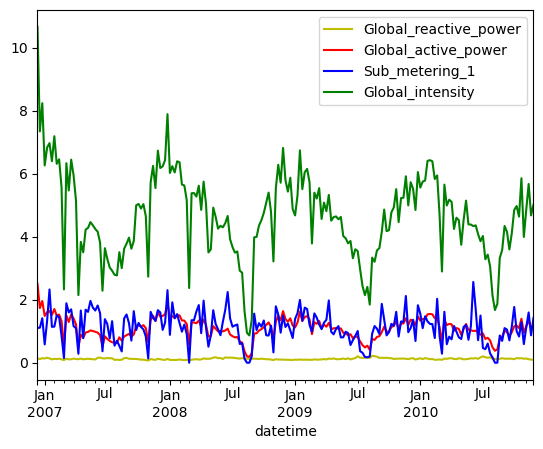

In [20]:
## resampling over week and computing mean
dataset.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
dataset.Global_active_power.resample('W').mean().plot(color='r', legend=True)
dataset.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
dataset.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

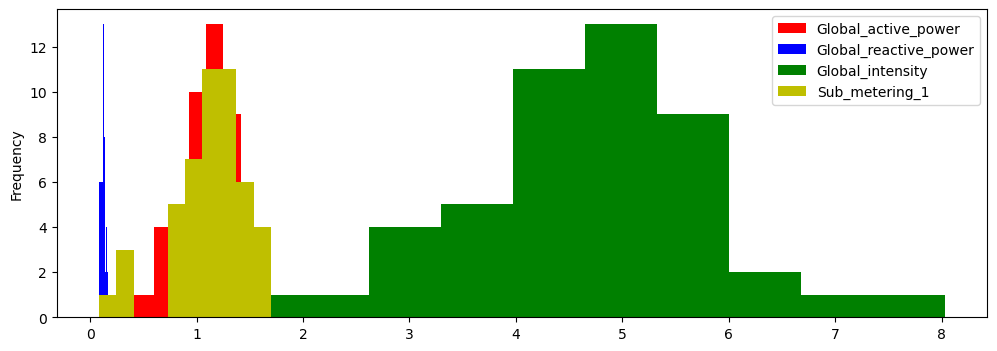

In [21]:
plt.figure(figsize=(12,4))
# Below I show hist plot of the mean of different feature resampled over month 
dataset.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
dataset.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
dataset.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
dataset.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

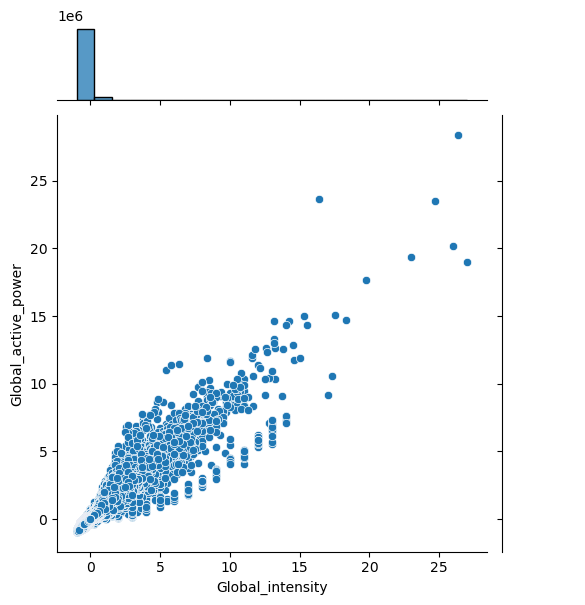

In [22]:
import seaborn as sns
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = dataset.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  

plt.show()

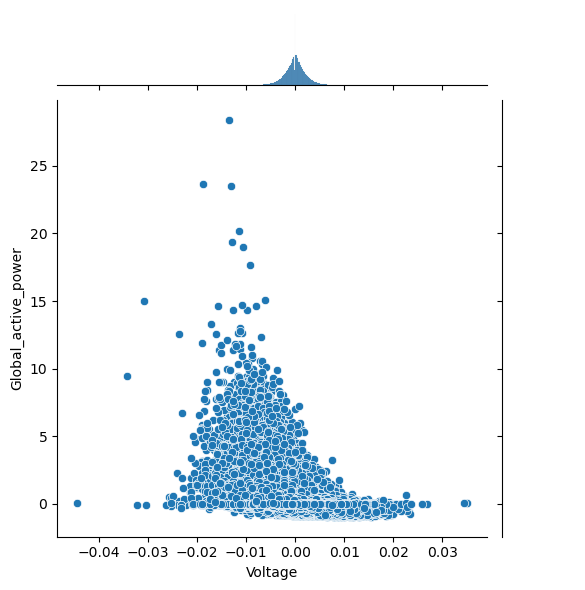

In [23]:
## The correlations between 'Voltage' and  'Global_active_power'
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

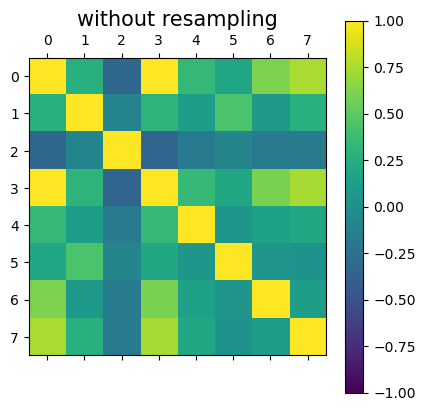

In [24]:
# Correlations among columns
plt.matshow(dataset.corr(method='spearman'),vmax=1,vmin=-1,cmap='viridis')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

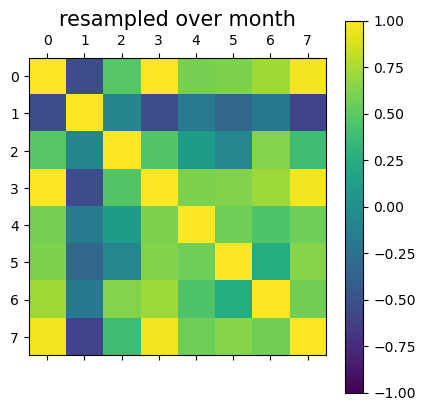

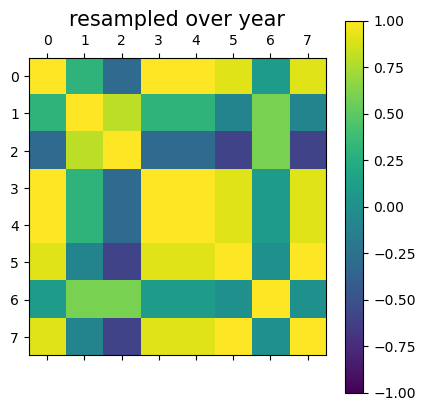

In [25]:
# Correlations of mean of features resampled over months


plt.matshow(dataset.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='viridis')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(dataset.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='viridis')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()